# In-Class Assignment: Exploring Regression Techniques
Objective:
The goal of this assignment is to apply five regression techniques—Multiple Linear Regression (MLR), Stochastic Gradient Descent (SGD), Ridge Regression, Lasso Regression, and Polynomial Regression—on a from Kaggle. You will compare the performance of these models and interpret the results.
https://www.kaggle.com/datasets/CooperUnion/cardataset

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Load a dataset
data= pd.read_csv('/content/drive/MyDrive/CS 430/data.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# Check data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## What are the basic properties of the dataset

- What is the shape of the dataset (number of rows and columns)?
- What are the column names, and what do they represent?
- What is the data type of each column?

In [4]:
#shape of the data set
row,column=data.shape
print(f"The data has {row} rows and {column} columns")
data.columns =['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP']
print(f"\nThe column names are {data.columns}")
#data.dtypes
print(f"\nThe data types as follows,\n{data.dtypes}")

The data has 11914 rows and 16 columns

The column names are Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

The data types as follows,
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


### Missing Data
- Are there any missing values in the dataset?
- Which columns have missing values, and how many?

In [5]:
data.isnull().sum()

# There are 5 columns with missing values: Engine Fuel Type	has 3, Engine HP has 69, Engine Cylinders	has 30, Number of Doors	6, Market Category has 3742.

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


### Descriptive Statistics:
- What are the summary statistics of the numerical columns?
- What are the mean, median, min, max, and standard deviation of the numerical columns?

In [6]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Target Variable:
How is the target variable distributed?

If the target variable is numerical (e.g., house prices, car prices or insurance charges), plot a histogram to visualize its distribution.

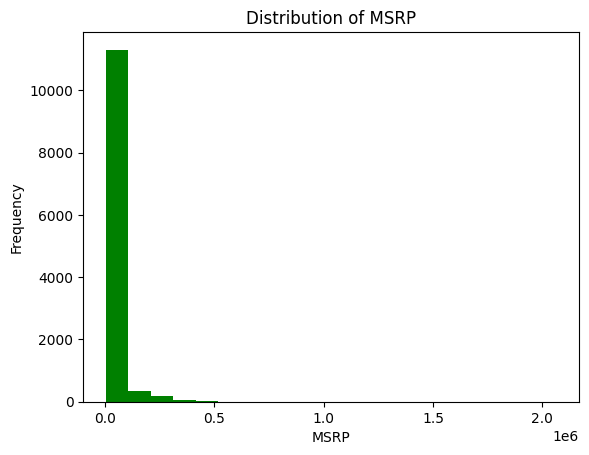

In [7]:
#creating a histogram
plt.hist(data['MSRP'], bins=20, color='green')
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.title('Distribution of MSRP')
plt.show()

### Relationships Between Features:
- Are there correlations between the numerical variables?

- Are there features that are highly correlated (positively or negatively)?
- How does each feature correlate with the target variable?

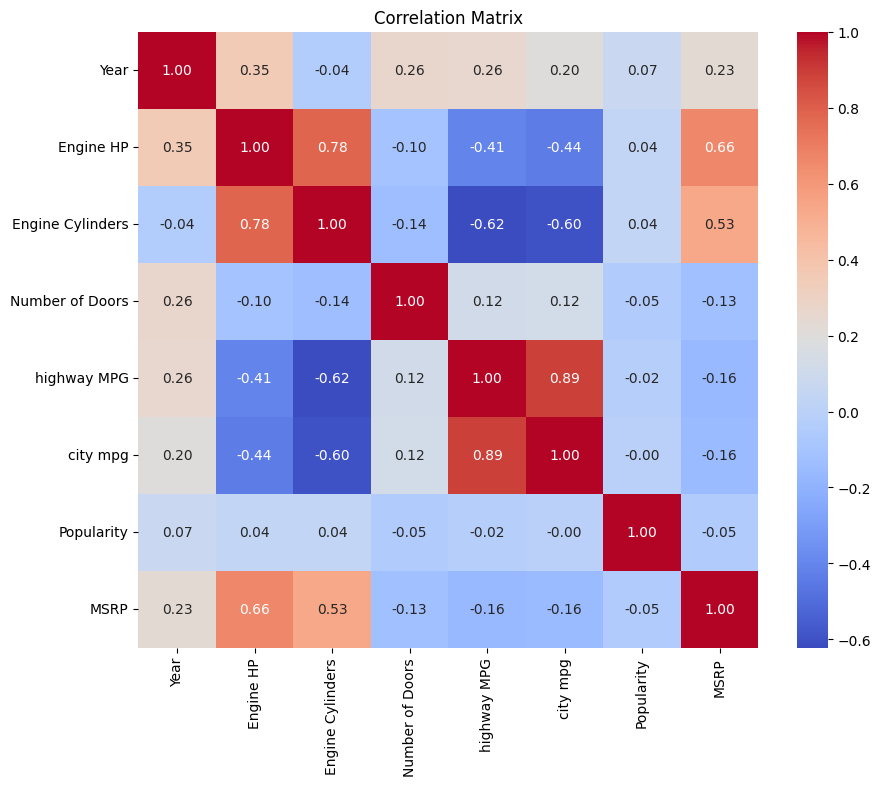

In [8]:
#creating a correlation matrix of numeric data
numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Are there any potential outliers in the dataset?
- Use boxplots or scatter plots to identify potential outliers.
- Should outliers be removed or dealt with in some other way?

In [9]:
data_num=data.select_dtypes('number')


# For each numeric column, calculate the IQR and remove outliers
for col in data_num:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers in the current column
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Display the cleaned dataset shape after outlier removal
print(f"Cleaned data size: {data.shape}")

Cleaned data size: (9033, 16)


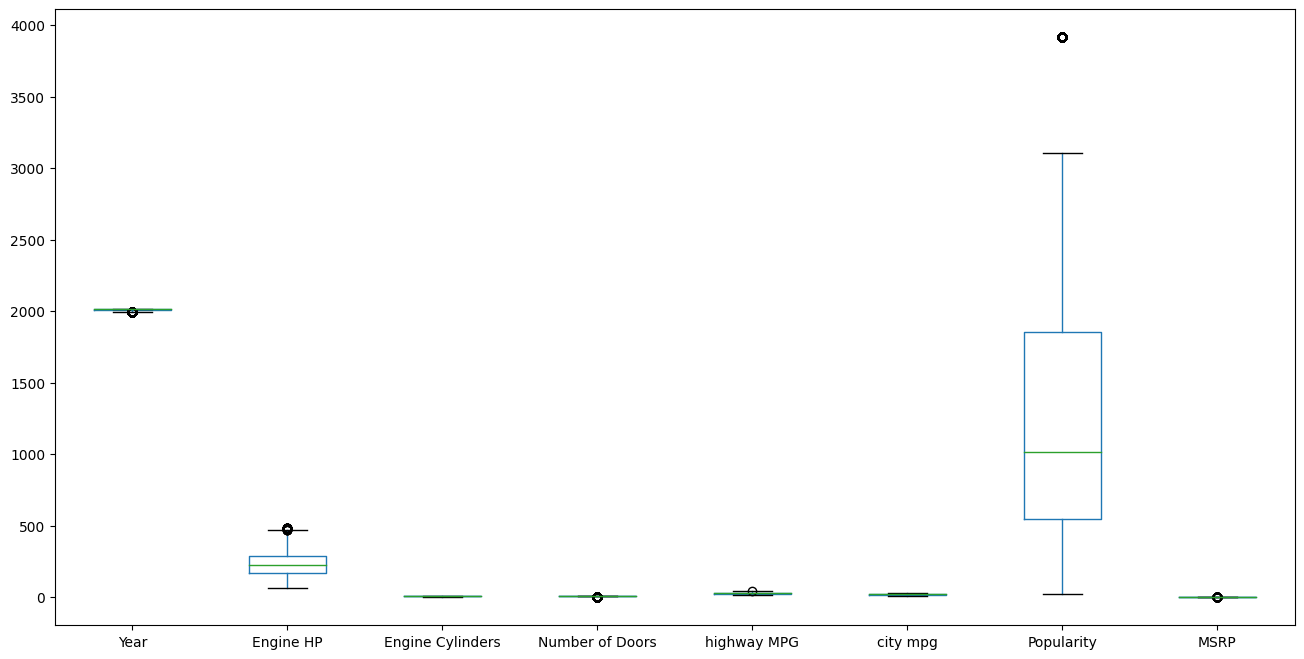

In [27]:
#creating a boxplot
plt.figure(figsize=(16, 8))
outliers= data
outliers.boxplot()
plt.grid(False)
plt.show()

### Data Cleaning:
- Are there any issues in the data that need to be cleaned?

- Are there duplicated rows that should be removed?

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

In [15]:

#removing duplicate rows
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)


0


### Split into features and target

In [16]:
x = data.drop('MSRP', axis=1)
y = data['MSRP']

### Feature Engineering

In [17]:
# Identify numerical and categorical columns
numerical_features = x.select_dtypes(include=[np.number]).columns
categorical_features = x.select_dtypes(include=['object']).columns


### Preprocessing Pipelines

In [18]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])




### Create a function to build and evaluate models using pipelines

In [19]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.named_steps['model'].__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print('-' * 50)

In [20]:
#scaling y variable
scalar = StandardScaler()
data['MSRP'] = scalar.fit_transform(data[['MSRP']])
y=data['MSRP']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model pipelines

In [25]:
# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Lasso Regression Pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

# Stochastic Gradient Descent (SGD) Pipeline
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))
])
# Polynomial Regression Pipeline (degree=2)
polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])



### Evaluate all models

In [26]:

for model in [linear_pipeline, ridge_pipeline, lasso_pipeline, sgd_pipeline, polynomial_pipeline]:
    evaluate_model(model, X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Squared Error: 0.0642
R² Score: 0.9343
--------------------------------------------------
Model: Ridge
Mean Squared Error: 0.0627
R² Score: 0.9359
--------------------------------------------------
Model: Lasso
Mean Squared Error: 0.3221
R² Score: 0.6708
--------------------------------------------------
Model: SGDRegressor
Mean Squared Error: 0.1443
R² Score: 0.8525
--------------------------------------------------
Model: LinearRegression
Mean Squared Error: 0.1069
R² Score: 0.8907
--------------------------------------------------


### Interpretation:
Discuss the effectiveness of each model. Which model performed the best and why?

When looking at what model is better you need to look at how close R^2 is to 1 and how close the mean squared error is to zero. When looking at the models The linear regression the R score was 0.93 and MSE of 0.0642. This means that this model performed well. The Ridge model did about the same as the previous model with a R^2 of 0.94 and a MSE of 0.0627. The lasso model did not perform well with a R^2 score of 0.67 and a MSE of 0.3221. SDGRegressor did alright with an R^2 score of 0.85 and a MSE of 0.1443. The final model of Linear Regressor did sightly better than the perivous model with an R^2 score of 0.89 and a MSE value of 0.1069. In conclusion the Lasso model was the worse model out of all of them with the highest MSE and lowest R^2 value and the Ridge model is the best model with the lowest MSE and highest R^2 score.

### Submission Requirements:

Submit your Jupyter notebook with the code for all models on Moodle using Github.
Include clear markdown cells explaining your approach, observations from EDA, preprocessing steps, and a detailed discussion of the results.